## Introduction to Data Science

### Textual Analysis  

In [34]:
import os
import pathlib
import time
import codecs
import string
import re
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import urllib
import requests
from bs4 import BeautifulSoup

import nltk
import networkx as nx
import gensim
from wordcloud import WordCloud
import textract

from IPython.core.display import Image
%matplotlib inline

Specifying the path to the files

In [2]:
datapath = pathlib.Path("../datasets/")
outputs = pathlib.Path("../outputs/")

oplexicon = 'oplexicon_v3.0/lexico_v3.0.txt'

Examinando os arquivos e pastas:

In [30]:
onlydirs = [f for f in os.listdir(datapath) if os.path.isdir(os.path.join(datapath,f)) and not f.startswith('.')]
onlydirs

['CSVs',
 'AVidhya',
 'Miscellaneous',
 'Names',
 'Oplexicon_v3.0',
 'Texts',
 'Figs']

In [37]:
corpuspath = datapath / 'Texts'
onlyfiles = [f for f in os.listdir(corpuspath) if os.path.isfile(os.path.join(corpuspath,f)) and not f.startswith('.')]
onlydirs.sort()

print('Files in the folder:')
for i, w in enumerate(onlyfiles[0:]):
    print(i+1, '--' ,w)

Files in the folder:
1 -- ARTIGOS-RBE-COM-RESUMO.xlsx
2 -- AldousHuxley_bravenewworld.pdf
3 -- MarcelProust_EmBuscadoTempoPerdido.pdf
4 -- RobertFrost_Poetry.pdf


Loading first corpus:

In [12]:
df = pd.read_excel(os.path.join(corpuspath, 'ARTIGOS-RBE-COM-RESUMO.xlsx'))
df.head()

,N,Revista,Título do artigo,Resumo,Volume,Número,Ano,Autores,Nº de Autores,URL
0,1,Revista Brasileira de Economia,Miséria ou Abundância: Alguns Modelos de Cresc...,NaN,20,1,1966,"Kingston, Lúcia Silva",1,http://bibliotecadigital.fgv.br/ojs/index.php/...
1,2,Revista Brasileira de Economia,Comentário sobre o Modelo Econométrico de Tint...,NaN,25,1,1971,"Fioravante, Moacyr;Naylor, Thomas H.;Monteiro,...",3,http://bibliotecadigital.fgv.br/ojs/index.php/...
2,3,Revista Brasileira de Economia,Modernização e desigualdade na agricultura bra...,NaN,43,2,1989,"Hoffmann, Rodolfo;Kassouf, Ana Lúcia",2,http://bibliotecadigital.fgv.br/ojs/index.php/...
3,4,Revista Brasileira de Economia,Optimal Insider Strategy with Law Penalties,We study the optimal continuous trading strate...,70,1,2016,"Fajardo, Jose",1,http://bibliotecadigital.fgv.br/ojs/index.php/...
4,5,Revista Brasileira de Economia,Demands for Short-Run Assets and Liabilities i...,NaN,60,1,2006,"Silva, Evandro;Resende, Marcelo",2,http://bibliotecadigital.fgv.br/ojs/index.php/...


In [13]:
df.columns

Index(['N', 'Revista', 'Título do artigo', 'Resumo', 'Volume', 'Número', 'Ano',
       'Autores', 'Nº de Autores', 'URL'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 10 columns):
N                   1556 non-null int64
Revista             1556 non-null object
Título do artigo    1556 non-null object
Resumo              330 non-null object
Volume              1556 non-null int64
Número              1556 non-null object
Ano                 1556 non-null int64
Autores             1556 non-null object
Nº de Autores       1556 non-null int64
URL                 1556 non-null object
dtypes: int64(4), object(6)
memory usage: 121.6+ KB


In [16]:
df['texto'] = df['Título do artigo'] + " "
textos = df['texto'].sum()
textos[0:1000]

'Miséria ou Abundância: Alguns Modelos de Crescimento para Economias Subdesenvolvidas Comentário sobre o Modelo Econométrico de Tinther, para o Brasil Modernização e desigualdade na agricultura brasileira Optimal Insider Strategy with Law Penalties Demands for Short-Run Assets and Liabilities in Brazil: a Portfolio Approach Alguns Reparos sobre a Teoria do Multiplicador INTRODUÇÃO: ORIGENS HISTÓRICAS DO SUBDESENVOLVIMENTO CONTEMPORÂNEO Princípios para a reformulação da política comercial brasileira A reforma da economia socialista: lições dos primeiros três anos Intensidades fatoriais na economia brasileira: novo teste empírico do teorema de Heckscher-Ohlin Algumas Considerações sobre as Fases do Desenvolvimento Econõmico Poupança e crescimento econômico Padrões de Convergência e Divergência do Crescimento Econômico Regional e das Migrações no Brasil - 1940-1960 Octavio Gouveia de Bulhões - Orientação e Controle da Economia The Economic Theory of Regulation: the Case of Agrarian Reform

In [19]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords = stop_en + stop_pt
stopwords.extend(['-',''])

In [20]:
lista = textos.split()
lista = [l.strip().lower() for l in lista]
lista = [l.strip(string.punctuation) for l in lista]
lista = [l for l in lista if l not in stopwords]

freqdist = Counter(lista)
freqdist.most_common(30)

[('brasil', 271),
 ('sobre', 141),
 ('brasileira', 96),
 ('desenvolvimento', 96),
 ('política', 87),
 ('economia', 87),
 ('econômico', 85),
 ('análise', 82),
 ('inflação', 74),
 ('brazil', 66),
 ('econômica', 59),
 ('modelo', 53),
 ('renda', 50),
 ('preços', 50),
 ('monetária', 50),
 ('crescimento', 49),
 ('teoria', 48),
 ('brasileiro', 48),
 ('brazilian', 46),
 ('mercado', 44),
 ('caso', 41),
 ('agricultura', 40),
 ('plano', 38),
 ('capital', 34),
 ('fiscal', 33),
 ('nota', 31),
 ('indústria', 31),
 ('efeitos', 29),
 ('inflation', 29),
 ('avaliação', 28)]

In [23]:
texto_limpo = ' '.join(lista)
wordcloud = WordCloud().generate(texto_limpo)

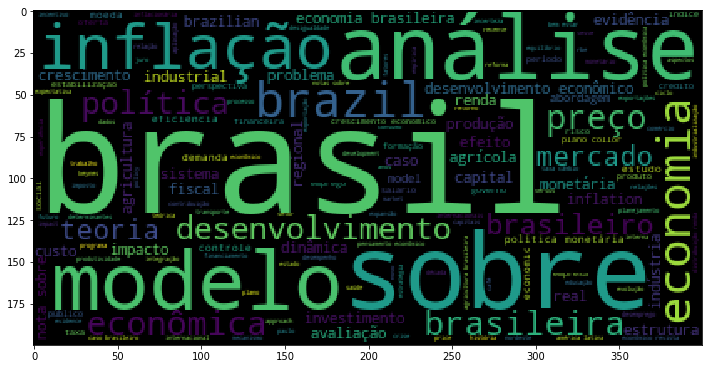

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()

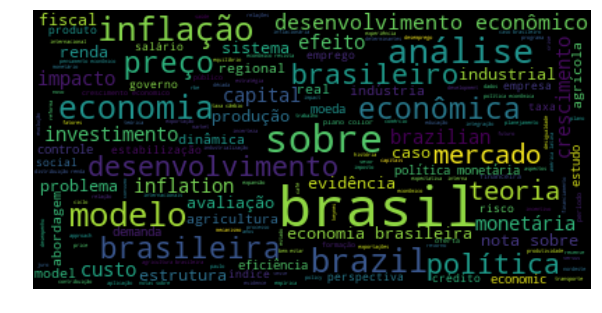

In [25]:
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(texto_limpo)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [26]:
# The pil way (if you don't have matplotlib)
image = wordcloud.to_image()
image.show()

Loading second corpus

In [38]:
print('Files in the folder:')
for i, w in enumerate(onlyfiles[0:]):
    print(i+1, '--' ,w)

Files in the folder:
1 -- ARTIGOS-RBE-COM-RESUMO.xlsx
2 -- AldousHuxley_bravenewworld.pdf
3 -- MarcelProust_EmBuscadoTempoPerdido.pdf
4 -- RobertFrost_Poetry.pdf


In [41]:
raw_texts = ''
for filename in [f for f in onlyfiles if f.endswith('pdf')]:
    text = textract.process(os.path.join(corpuspath,filename)).decode('utf-8')
    print(text[0:100])
    raw_texts += '\n'+ text

Brave New World
Aldous Leonard Huxley
February 6, 2002

Contents
One

5

Two

17

Three

25

Four

MARCEL PROUST
EM BUSCA DO TEMPO PERDIDO

EM BUSCA DO TEMPO PERDIDO
NO CAMINHO DE SWANN - COMBRAY
vol
Classic Poetry Series

Robert Frost
- poems -

Publication Date:
2004

Publisher:

PoemHunter.Com - 


In [42]:
print(len(raw_texts))

7342550


Cleaning and homogenizing texts:

In [ ]:
cleaned_texts = raw_texts.lower()


Finding ocurrences of an expression:

In [47]:
expression = 'life'
pos = 0 
positions = []
while pos != -1:
    position = raw_texts.find(expression,pos+1)
    pos = position
    positions.append(position)
positions.pop()
print('The expression is found {} times'.format(len(positions)))

The expression is found 60 times


In [49]:
for position in positions: #[0:10]:
    print(raw_texts[position - 200:position + 200].strip())

s.
“Bokanovsky’s Process,” repeated the Director, and the students
underlined the words in their little notebooks.
One egg, one embryo, one adult-normality. But a bokanovskified egg will bud, will proliferate, will divide. From eight to ninetysix buds, and every bud will grow into a perfectly formed embryo,
and every embryo into a full-sized adult. Making ninety-six human
beings grow where only on
s all one scarlet blob.

24

TWO

“Till at last the child’s mind is these suggestions, and the sum of
the suggestions is the child’s mind. And not the child’s mind only.
The adult’s mind too-all his life long. The mind that judges and
desires and decides- made up of these suggestions. But all these
suggestions are our suggestions!” The Director almost shouted in
his triumph. “Suggestions from the
ent out to see if one of the vibro- vacuum
machines were free.
And home was as squalid psychically as physically. Psychically,
it was a rabbit hole, a midden, hot with the frictions of tightly
packe

Um passo opcional - retirar as stopwords que podem interferir nas análises

In [ ]:
ignore_words = [w for w in nltk.corpus.stopwords.words('portuguese')]
#ignore_words.extend([s.decode('utf-8') for s in string.punctuation])
ignore_words.extend([u' ', u'', u'é', u'r',u'c',u'ainda',u'vai',u'ser',u'globo',u'sobre',u'nesta',u'\u2013',u'\u2014', u'pode',
                     u'ter', u'disse'])
ignore_expressions = [u'Copyright © 2013', u'Copyright © 2014',u'Todos os direitos reservados', 
                      u'Agência Estado', u'Jornal O Globo', u'Folha de S.Paulo', 'Globo Digital', u'SEGUNDO CADERNO',
                      u'Noblat', u'Agamenon Mendes Pedreira', u'Agamenon', u'Merval Pereira', u'Merval', u'Amaury de Souza',
                      u'Boa Viagem', u'v\xeddeos pol\xedticos', u'Esta\xe7\xe3o Jazz e Tal', u'a r\xe1dio do blog',
                      u'Siga o', u'Leia a', u'Ou\xe7a a', u'Curta a P\xe1gina', u'Visite a p\xe1gina', u'no Twitter','no Facebook', u'Blog do', 
                      u'Tradu\xe7\xe3o', u'mat&eacute;ria na &iacute;ntegra', u'\xedntegra da mat\xe9ria', u'para assinantes',
                      u'por exemplo', u'cada vez', 'datafolha']

In [ ]:
for e in ignore_expressions:
    print e

In [ ]:
def corrige_distorcoes(texto):
    texto = texto.replace(u'\xe0', u'a a') #separa o a com crase
    texto = texto.replace(u'\u201c', '') #retira um certo tipo de aspas
    texto = texto.replace(u'\u201d', '') #retira um certo tipo de aspas
    texto = texto.replace(u'\u2018', '') #retira um certo tipo de aspas
    texto = texto.replace(u'\u2019', '') #retira um certo tipo de aspas
    texto = texto.replace(u'get\xfalio vargas', u'getulio vargas') #homogeniza as formas de Getulio Vargas
    return texto
    
def limpa_stopwords(texto):
    for expression in ignore_expressions:
        texto = texto.replace(expression.lower(),'') #retira as expressoes
    lista = [w.strip(string.punctuation) for w in texto.split() if w.strip(string.punctuation) not in ignore_words] #retira stopw.
    texto = u' '.join(lista)
    return texto, lista

In [ ]:
raw_texts = corrige_distorcoes(raw_texts)
cleaned_texts, list_cleaned_words = limpa_stopwords(raw_texts)

A primeira coisa a se analisar são - pura e simplesmente - as palavras (sem stopwords)

In [ ]:
freq_words = Counter(list_cleaned_words)
df_freq_words = pd.DataFrame(freq_words.values(), columns = [u'Frequência'], index=freq_words.keys())
df_freq_words = df_freq_words.sort_index(by=u'Frequência', ascending=False)
df_freq_words.index.name = u'Tokens'
df_freq_words[0:40]

Calculando a polaridade total dos textos

In [ ]:
polariza_counter(freq_words, df_o);

Vamos visualizar as palavras mais frequentes de várias formas:

In [ ]:
def print_vk(lst):
    """Print a list of value/key pairs nicely formatted in key/value order."""

    # Find the longest key: remember, the list has value/key pairs, so the key
    # is element [1], not [0]
    longest_key = max([len(word) for word, count in lst])
    # Make a format string out of it
    fmt = '%'+str(longest_key)+'s -> %s'
    # Do actual printing
    for k,v in lst:
        print fmt % (k,v)
    print('\n')

In [ ]:
def plot_word_histogram(freqs, show=10, title=None):
    """Plot a histogram of word frequencies, limited to the top <show> ones.
    """
    sorted_f = sort_freqs(freqs) if isinstance(freqs, dict) else freqs

    # Don't show the tail
    if isinstance(show, int):
        # interpret as number of words to show in histogram
        show_f = sorted_f[-show:]
    else:
        # interpret as a fraction
        start = -int(round(show*len(freqs)))
        show_f = sorted_f[start:]

    # Now, extract words and counts, plot
    n_words = len(show_f)
    ind = np.arange(n_words)
    words = [i[0] for i in show_f]
    counts = [i[1] for i in show_f]

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)

    if n_words<=20:
        # Only show bars and x labels for small histograms, they don't make
        # sense otherwise
        ax.bar(ind, counts)
        ax.set_xticks(ind)
        ax.set_xticklabels(words, rotation=45)
        fig.subplots_adjust(bottom=0.25)
    else:
        # For larger ones, do a step plot
        ax.step(ind, counts)

    # If it spans more than two decades, use a log scale
    if float(max(counts))/min(counts) > 100:
        ax.set_yscale('log')

    if title:
        ax.set_title(title)
    return ax

In [ ]:
number_words=15      
w_items = freq_words.items()
w_items.sort(key = lambda wc: wc[1])
print 'Number of unique words:',len(w_items)
#print('{} least frequent words:').format(number_words)
#print_vk(w_items[:10])
#print('{} most frequent words:').format(number_words)
print_vk(w_items[:-10:-1])
plot_word_histogram(w_items, number_words,'Frequencies for {} most frequent words'.format(number_words));

In [ ]:
fd_words = nltk.FreqDist(freq_words)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 
fd_words.plot(30)

E a distribuição cumulativa das frequências:

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 
fd_words.plot(30, cumulative = True)

In [ ]:
count = np.array(freq_words.values())
words = np.array(freq_words.keys())
count = count.astype(int)
make_wordcloud(words, count, 'test.png')
Image(filename='test.png', width=640, height=480)

Vamos agora construir um grafo de palavras para estudar co-ocorrências nos textos dos feeds

Abordagem e funções aproveitadas de https://github.com/ipython/talks/blob/master/notebook/text_utils.py

In [ ]:
def all_pairs(items):
    """Make all unique pairs (order doesn't matter)"""
    pairs = []
    nitems = len(items)
    for i, wi in enumerate(items):
        for j in range(i+1, nitems):
            pairs.append((wi, items[j]))
    return pairs

def co_occurrences(lines, words):
    """Return histogram of co-occurrences of words in a list of lines.

    Parameters
    ----------
    lines : list
      A list of strings considered as 'sentences' to search for co-occurrences.

    words : list
      A list of words from which all unordered pairs will be constructed and
      searched for co-occurrences.
    """
    wpairs = all_pairs(words)

    # Now build histogram of co-occurrences
    co_occur = {}
    for w1, w2 in wpairs:
        rx = re.compile('%s .*%s|%s .*%s' % (w1, w2, w2, w1))
        co_occur[w1, w2] = sum([1 for line in lines if rx.search(line)])

    return co_occur

def co_occurrences_graph(word_hist, co_occur, cutoff=0):
    """Convert a word histogram with co-occurrences to a weighted graph.
    Edges are only added if the count is above cutoff.
    """
    g = nx.Graph()
    for word, count in word_hist:
        g.add_node(word, count=count)
    for (w1, w2), count in co_occur.iteritems():
        if count<=cutoff:
            continue
        g.add_edge(w1, w2, weight=count)
    return g

In [ ]:
n_nodes = 15
popular = w_items[-n_nodes:]
pop_words = [wc[0] for wc in popular]
co_occur = co_occurrences(list_raw_texts, pop_words)
wgraph = co_occurrences_graph(popular, co_occur, cutoff=1)
wsubgraph = list(nx.connected_component_subgraphs(wgraph))[1] #we have to choose the biggest con. comp.
centrality = nx.eigenvector_centrality_numpy(wsubgraph)
c = centrality.items()
c.sort(key=lambda x:x[1], reverse=True)
print '\nGraph centrality'
for node, cent in c:
    print "%15s: %.3g" % (node, float(cent))

In [ ]:
rad0 = 0.2
def rescale_arr(arr, amin, amax):
    """Rescale an array to a new range.
    Return a new array whose range of values is (amin, amax).
    Parameters
    ----------
    arr : array-like
    amin : float
      new minimum value
    amax : float
      new maximum value

    Examples
    --------
    >>> a = np.arange(5)
    >>> rescale_arr(a,3,6)
    array([ 3.  ,  3.75,  4.5 ,  5.25,  6.  ])
    """
    # old bounds
    m = arr.min()
    M = arr.max()
    # scale/offset
    s = float(amax-amin)/(M-m)
    d = amin - s*m

    # Apply clip before returning to cut off possible overflows outside the
    # intended range due to roundoff error, so that we can absolutely guarantee
    # that on output, there are no values > amax or < amin.
    return np.clip(s*arr+d,amin,amax)

def plot_graph(wgraph, pos=None, fig=None, title=None):
    """Conveniently summarize graph visually"""

    # config parameters
    edge_min_width= 3
    edge_max_width= 12
    label_font = 16
    node_font = 18
    node_alpha = 0.4
    edge_alpha = 0.55
    edge_cmap = plt.cm.Spectral

    # Create figure
    if fig is None:
        fig, ax = plt.subplots()
    else:
        ax = fig.add_subplot(111)
    fig.subplots_adjust(0,0,1)

    # Plot nodes with size according to count
    sizes = []
    degrees = []
    for n, d in wgraph.nodes_iter(data=True):
        sizes.append(d['count'])
        degrees.append(wgraph.degree(n))

    sizes = rescale_arr(np.array(sizes, dtype=float), 100, 1000)

    # Compute layout and label edges according to weight
    pos = nx.spring_layout(wgraph) if pos is None else pos
    labels = {}
    width = []
    for n1, n2, d in wgraph.edges_iter(data=True):
        w = d['weight']
        labels[n1, n2] = w
        width.append(w)

    width = rescale_arr(np.array(width, dtype=float), edge_min_width, 
                        edge_max_width)

    # Draw
    nx.draw_networkx_nodes(wgraph, pos, node_size=sizes, node_color=degrees,alpha=node_alpha)
    nx.draw_networkx_edges(wgraph, pos, width=width, edge_color=width, edge_cmap=edge_cmap, alpha=edge_alpha)
    nx.draw_networkx_edge_labels(wgraph, pos, edge_labels=labels,font_size=label_font)
    nx.draw_networkx_labels(wgraph, pos, font_size=node_font, font_weight='bold')
    if title is not None:
        ax.set_title(title, fontsize=label_font)
    ax.set_xticks([])
    ax.set_yticks([])

    # Mark centrality axes
    kw = dict(color='k', linestyle='-')
    cross = [ax.axhline(0, **kw), ax.axvline(rad0, **kw)]
    [ l.set_zorder(0) for l in cross]
    
def centrality_layout(wgraph, centrality):
    """Compute a layout based on centrality.
    """
    # Create a list of centralities, sorted by centrality value
    cent = sorted(centrality.items(), key=lambda x:float(x[1]), reverse=True)
    nodes = [c[0] for c in cent]
    cent  = np.array([float(c[1]) for c in cent])
    rad = (cent - cent[0])/(cent[-1]-cent[0])
    rad = rescale_arr(rad, rad0, 1)
    angles = np.linspace(0, 2*np.pi, len(centrality))
    layout = {}
    for n, node in enumerate(nodes):
        r = rad[n]
        th = angles[n]
        layout[node] = r*np.cos(th), r*np.sin(th)
    return layout

In [ ]:
print "Graph visualization for query:"
plot_graph(wsubgraph, centrality_layout(wsubgraph, centrality), 
           plt.figure(figsize=(12,12)), 
           title = u'Centrality and term co-occurrence graph, q="{}"'.format(query))

Para entender os contextos, uma análise de concordâncias
(palavras associadas à expressão escolhida, posicionadas na mesma sentença):

In [ ]:
tknzr = nltk.tokenize.WordPunctTokenizer()
tokens = tknzr.tokenize(raw_texts) # texto com stopwords
#tokens = tknzr.tokenize(cleaned_texts) # texto sem stopwords
nltk_text = nltk.Text(tokens)
nltk_text.concordance(query.lower(), width=120, lines=10)

Palavras que ocorrem em contextos similares (associadas às mesmas palavras que a consulta):

In [ ]:
nltk_text.similar(query)

As colocações (que não são co-ocorrências) nos informam sobre as palavras (quaisquer, não necessariamente ligadas à consulta) que ocorrem conjuntamente (bigramas frequentes):
http://en.wikipedia.org/wiki/Collocation
http://en.wikipedia.org/wiki/Co-occurrence

In [ ]:
nltk_text.collocations(num=100, window_size=2)

Collocations are expressions of multiple words which commonly co-occur.

Below we are using Pointwise Mutual Information.

http://en.wikipedia.org/wiki/Pointwise_mutual_information

In [ ]:
max_items = 50
freq_min_b = 10
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder2 = nltk.collocations.BigramCollocationFinder.from_words(nltk_text)
finder2.apply_word_filter(lambda w: w in string.punctuation)
finder2.apply_freq_filter(freq_min_b)
for a, b in finder2.nbest(bigram_measures.pmi, max_items):
    print a, b

In [ ]:
max_items = 50
freq_min_t = 6
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(nltk_text)
finder3.apply_word_filter(lambda w: w in string.punctuation)
finder3.apply_ngram_filter(lambda w1, w2, w3:  w1 in ['da', 'de', 'das'])
finder3.apply_freq_filter(freq_min_t)
for a, b, c in finder3.nbest(trigram_measures.pmi, max_items):
    print a, b, c

In [ ]:
for a, b in (finder2.above_score(bigram_measures.raw_freq,1.0 / len(list(nltk.bigrams(tokens))))):
        print a, b

In [ ]:
for a, b, c in finder3.above_score(trigram_measures.raw_freq,1.0 / len(list(nltk.trigrams(tokens)))):
        print a, b, c

In [ ]:
from nltk.util import ngrams
n = 4
xgrams = ngrams(tokens, n)
xgrams_counter = Counter(xgrams)
df_ngrams = pd.DataFrame(xgrams_counter.items(), columns = [u'n-gramas',u'Frequência'])
df_ngrams = df_ngrams.sort_index(by=u'Frequência', ascending=False)
df_ngrams.set_index([u'n-gramas'], inplace=True)
df_ngrams[0:40]

In [ ]:
nltk_text.dispersion_plot([u'fgv', 
                      u'ipea', 
                      u'ibge',
                      u'aécio',
                      u'dilma',
                      u'lula',
                      u'renda',
                      u'cps-fgv',
                      ])

As funções a seguir permitem extrair as frases mais significativas do texto (sumarização automática)

In [ ]:
def score_sentences(sentences, important_words):
    # Approach taken from "The Automatic Creation of Literature Abstracts" by H.P. Luhn
    CLUSTER_THRESHOLD = 5  # Distance between words to consider
    scores = []
    sentence_idx = -1
    #for s in [nltk.tokenize.word_tokenize(s) for s in sentences]:
    punktw2 = nltk.tokenize.WordPunctTokenizer() #trocando pelo punkt (melhor?)
    for s in [punktw2.tokenize(s) for s in sentences]:    
        sentence_idx += 1
        word_idx = []
        # For each word in the word list...
        for w in important_words:
            try:
                # Compute an index for where any important words occur in the sentence
                word_idx.append(s.index(w))
            except ValueError, e: # w not in this particular sentence
                pass
        word_idx.sort()
        # It is possible that some sentences may not contain any important words at all
        if len(word_idx)== 0: continue
        # Using the word index, compute clusters by using a max distance threshold
        # for any two consecutive words
        clusters = []
        cluster = [word_idx[0]]
        i = 1
        while i < len(word_idx):
            if word_idx[i] - word_idx[i - 1] < CLUSTER_THRESHOLD:
                cluster.append(word_idx[i])
            else:
                clusters.append(cluster[:])
                cluster = [word_idx[i]]
            i += 1
        clusters.append(cluster)
        # Score each cluster. The max score for any given cluster is the score 
        # for the sentence
        max_cluster_score = 0
        for c in clusters:
            significant_words_in_cluster = len(c)
            total_words_in_cluster = c[-1] - c[0] + 1
            score = 1.0 * significant_words_in_cluster \
                * significant_words_in_cluster / total_words_in_cluster
            if score > max_cluster_score:
                max_cluster_score = score
        scores.append((sentence_idx, score))
    return scores

In [ ]:
def summarize(txt):
    TOP_SENTENCES = 10  # Number of sentences to choose on "top n"
    N = 100  # Number of words to consider
    #sentences = [s for s in nltk.tokenize.sent_tokenize(txt)]
    punkts = nltk.tokenize.PunktSentenceTokenizer() #trocando pelo punkt (melhor?)
    punktw = nltk.tokenize.WordPunctTokenizer() #trocando pelo punkt (melhor?)
    sentences = [s for s in punkts.tokenize(txt)]
    normalized_sentences = [s.lower() for s in sentences]
    words = [w.lower() for sentence in normalized_sentences for w in punktw.tokenize(sentence)]
    fdist = nltk.FreqDist(words)
    top_n_words = [w[0] for w in fdist.items() if w[0] not in ignore_words][:N]
    scored_sentences = score_sentences(normalized_sentences, top_n_words)
    # First approach:
    # Filter out non-significant sentences by using the average score plus a
    # fraction of the std dev as a filter
    avg = np.mean([s[1] for s in scored_sentences])
    std = np.std([s[1] for s in scored_sentences])
    mean_scored = [(sent_idx, score) for (sent_idx, score) in scored_sentences
                   if score > avg + 0.5 * std]
    # Second Approach: 
    # Return only the top N ranked sentences
    top_n_scored = sorted(scored_sentences, key=lambda s: s[1])[-TOP_SENTENCES:]
    top_n_scored = sorted(top_n_scored, key=lambda s: s[0])
    # Decorate the post object with summaries
    return dict(top_n_summary=[sentences[idx] for (idx, score) in top_n_scored],
                mean_scored_summary=[sentences[idx] for (idx, score) in mean_scored])

In [ ]:
sumarios = summarize(raw_texts)
sumarios['top_n_summary'] = set(sumarios['top_n_summary'])
sumarios['mean_scored_summary'] = set(sumarios['mean_scored_summary'])

print(u'frases mais importantes(1):\n')
for s in sumarios['top_n_summary']:
    print(u'{}\n'.format(s))

In [ ]:
print(u'\nfrases mais importantes(2):\n')
for s in sumarios['mean_scored_summary']:
    print(u'{}\n'.format(s))

Extração de palavras relevantes usando TF-IDf  
http://radimrehurek.com/gensim/models/tfidfmodel.html  
http://radimrehurek.com/gensim/tutorial.html  
http://radimrehurek.com/gensim/tut2.html  

In [ ]:
tokens_once = [key for key in freq_words.keys() if freq_words[key]==1]
texts = [[word.strip(string.punctuation) for word in document.lower().split() if word not in ignore_words]
         for document in list_raw_texts]
texts = [[word for word in text if word not in tokens_once and len(word) > 1] for text in texts]
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [ ]:
x = 1
for doc in corpus_tfidf:
    print(u'\nRelevant Words in Document {}:\n'.format(x))
    relev = 0
    top_w = ''
    x+=1
    for w_in_dic, tfidf_w in doc:
        if tfidf_w > relev:
            top_w = w_in_dic
            relev = tfidf_w
    if top_w != '' and relev > 0:
        print('{}\t{}'.format(dictionary[top_w], relev)) #Rever questão do UTF-8
    else:
        print('Nothing relevant')

#### [Goose](https://github.com/goose3/goose3)

Extracting text from html pages  

In [3]:
from goose3 import Goose

url = 'http://edition.cnn.com/2012/02/22/world/europe/uk-occupy-london/index.html?hpt=ieu_c2'
g = Goose(Goose({'use_meta_language': False, 'target_language':'en', 'parser_class':'lxml'}))

article = g.extract(url=url)

In [4]:
article.title

'Occupy London loses eviction fight'

In [5]:
article.meta_description

"Occupy London protesters who have been camped outside the landmark St. Paul's Cathedral for the past four months lost their court bid to avoid eviction Wednesday in a decision made by London's Court of Appeal."

In [6]:
article.cleaned_text[:150]

"Occupy London protesters who have been camped outside the landmark St. Paul's Cathedral for the past four months lost their court bid to avoid evictio"

In [7]:
article.top_image.src

'http://cdn.cnn.com/cnnnext/dam/assets/111230083702-mclaughlin-uk-occupy-london-00021228-story-top.jpg'

#### [Textblob](http://textblob.readthedocs.io/en/dev/)

https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/

Installing:  

!sudo pip3 install -U textblob  
!python -m textblob.download_corpora

In [3]:
from textblob import TextBlob
from textblob import Word

text = '''
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
'''

text_pt = '''
Com uma abordagem inédita, o curso de Mestrado em Modelagem Matemática 
integra à Matemática Aplicada o corpo de conhecimentos das Ciências da 
Computação e da Informação, com contextos de aplicações das ciências 
sociais, econômicas, biológicas e da saúde. O curso possibilita ao 
mestrando desenvolver a capacidade de analisar cenários e dar suporte 
à tomada de decisões em situações de uso intensivo de dados e informações, 
além de ter o objetivo de formar excelentes pesquisadores na área.
'''

In [4]:
blob = TextBlob(text)
blob_pt = TextBlob(text_pt)

In [5]:
blob.sentences

[Sentence("
 The titular threat of The Blob has always struck me as the ultimate movie
 monster: an insatiably hungry, amoeba-like mass able to penetrate
 virtually any safeguard, capable of--as a doomed doctor chillingly
 describes it--"assimilating flesh on contact."),
 Sentence("Snide comparisons to gelatin be damned, it's a concept with the most
 devastating of potential consequences, not unlike the grey goo scenario
 proposed by technological theorists fearful of
 artificial intelligence run rampant.")]

In [6]:
blob_pt.sentences

[Sentence("
 Com uma abordagem inédita, o curso de Mestrado em Modelagem Matemática 
 integra à Matemática Aplicada o corpo de conhecimentos das Ciências da 
 Computação e da Informação, com contextos de aplicações das ciências 
 sociais, econômicas, biológicas e da saúde."),
 Sentence("O curso possibilita ao 
 mestrando desenvolver a capacidade de analisar cenários e dar suporte 
 à tomada de decisões em situações de uso intensivo de dados e informações, 
 além de ter o objetivo de formar excelentes pesquisadores na área.")]

In [7]:
blob.sentences[1].words

WordList(['Snide', 'comparisons', 'to', 'gelatin', 'be', 'damned', 'it', "'s", 'a', 'concept', 'with', 'the', 'most', 'devastating', 'of', 'potential', 'consequences', 'not', 'unlike', 'the', 'grey', 'goo', 'scenario', 'proposed', 'by', 'technological', 'theorists', 'fearful', 'of', 'artificial', 'intelligence', 'run', 'rampant'])

Functions applied to the Word object:  

In [8]:
blob.sentences[1].words.singularize()

WordList(['Snide', 'comparison', 'to', 'gelatin', 'be', 'damned', 'it', "'", 'a', 'concept', 'with', 'the', 'most', 'devastating', 'of', 'potential', 'consequence', 'not', 'unlike', 'the', 'grey', 'goo', 'scenario', 'proposed', 'by', 'technological', 'theorist', 'fearful', 'of', 'artificial', 'intelligence', 'run', 'rampant'])

In [9]:
w = Word('Platform')
w.pluralize()

'Platforms'

Lemmatization  

In [10]:
w = Word('running')
w.lemmatize("v") ## v here represents verb

'run'

POS tags  

In [11]:
blob.tags[0:10]

[('The', 'DT'),
 ('titular', 'JJ'),
 ('threat', 'NN'),
 ('of', 'IN'),
 ('The', 'DT'),
 ('Blob', 'NNP'),
 ('has', 'VBZ'),
 ('always', 'RB'),
 ('struck', 'VBN'),
 ('me', 'PRP')]

In [12]:
blob_pt.tags[0:10]

[('Com', 'NNP'),
 ('uma', 'JJ'),
 ('abordagem', 'NN'),
 ('inédita', 'NN'),
 ('o', 'JJ'),
 ('curso', 'NN'),
 ('de', 'IN'),
 ('Mestrado', 'NNP'),
 ('em', 'CC'),
 ('Modelagem', 'NNP')]

Ngrams  

In [13]:
for ngram in blob.ngrams(2):
    print(ngram)

['The', 'titular']
['titular', 'threat']
['threat', 'of']
['of', 'The']
['The', 'Blob']
['Blob', 'has']
['has', 'always']
['always', 'struck']
['struck', 'me']
['me', 'as']
['as', 'the']
['the', 'ultimate']
['ultimate', 'movie']
['movie', 'monster']
['monster', 'an']
['an', 'insatiably']
['insatiably', 'hungry']
['hungry', 'amoeba-like']
['amoeba-like', 'mass']
['mass', 'able']
['able', 'to']
['to', 'penetrate']
['penetrate', 'virtually']
['virtually', 'any']
['any', 'safeguard']
['safeguard', 'capable']
['capable', 'of']
['of', 'as']
['as', 'a']
['a', 'doomed']
['doomed', 'doctor']
['doctor', 'chillingly']
['chillingly', 'describes']
['describes', 'it']
['it', 'assimilating']
['assimilating', 'flesh']
['flesh', 'on']
['on', 'contact']
['contact', 'Snide']
['Snide', 'comparisons']
['comparisons', 'to']
['to', 'gelatin']
['gelatin', 'be']
['be', 'damned']
['damned', 'it']
['it', "'s"]
["'s", 'a']
['a', 'concept']
['concept', 'with']
['with', 'the']
['the', 'most']
['most', 'devastating'

Noun Phrase Extraction

In [14]:
blob.noun_phrases

WordList(['titular threat', 'blob', 'ultimate movie monster', 'amoeba-like mass', 'snide', 'potential consequences', 'grey goo scenario', 'technological theorists fearful', 'artificial intelligence run rampant'])

In [15]:
blob_pt.noun_phrases

WordList(['com', 'uma abordagem inédita', 'o curso', 'mestrado', 'modelagem matemática', 'integra à', 'matemática aplicada', 'o corpo', 'conhecimentos das', 'ciências', 'computação', 'e da', 'informação', 'com contextos', 'aplicações das ciências sociais', 'biológicas e da saúde', 'o curso possibilita ao mestrando desenvolver', 'analisar cenários e dar suporte à tomada', 'decisões em situações', 'uso intensivo', 'dados e informações', 'ter o objetivo', 'formar excelentes pesquisadores na área'])

Sentiment Analysis  

In [16]:
for sentence in blob.sentences:
    print(sentence.sentiment.polarity)

0.06000000000000001
-0.34166666666666673


Translation

In [17]:
blob.translate(to="pt")

TextBlob("A ameaça titular de The Blob sempre me pareceu o melhor filme
Monstro: uma massa insaciável com fome e ameba capaz de penetrar
praticamente qualquer salvaguarda, capaz de - como um doutor doente com calma
descreve isso - "assimilando a carne no contato".
As combinações de Snide com a gelatina serão condenadas, é um conceito com o máximo
devastador de possíveis consequências, não muito diferente do cenário cinza
proposto por teóricos tecnológicos com medo de
a inteligência artificial corre desenfreada.")

Detecting language

In [26]:
blob_pt.detect_language()

'pt'

Spellcheck

In [22]:
blob = TextBlob('FGV is the bist think tenk in the word!')
blob.correct()

TextBlob("FGV is the best think ten in the word!")

In [25]:
blob.words[5].spellcheck()

[('ten', 0.6656534954407295),
 ('tend', 0.1580547112462006),
 ('tent', 0.0729483282674772),
 ('tens', 0.0486322188449848),
 ('teno', 0.03951367781155015),
 ('tenn', 0.00911854103343465),
 ('tank', 0.0060790273556231)]

Text classification

In [27]:
training = [
('Tom Holland is a terrible spiderman.','pos'),
('a terrible Javert (Russell Crowe) ruined Les Miserables for me...','pos'),
('The Dark Knight Rises is the greatest superhero movie ever!','neg'),
('Fantastic Four should have never been made.','pos'),
('Wes Anderson is my favorite director!','neg'),
('Captain America 2 is pretty awesome.','neg'),
('Let\s pretend "Batman and Robin" never happened..','pos'),
]

testing = [
('Superman was never an interesting character.','pos'),
('Fantastic Mr Fox is an awesome film!','neg'),
('Dragonball Evolution is simply terrible!!','pos')
]

In [28]:
from textblob import classifiers
nb_classifier = classifiers.NaiveBayesClassifier(training)
dt_classifier = classifiers.DecisionTreeClassifier(training)

In [30]:
print (nb_classifier.accuracy(testing))

1.0


In [32]:
nb_classifier.show_informative_features(3)

Most Informative Features
            contains(is) = True              neg : pos    =      2.9 : 1.0
      contains(terrible) = False             neg : pos    =      1.8 : 1.0
             contains(a) = False             neg : pos    =      1.8 : 1.0


In [33]:
blob = TextBlob('the weather is terrible!', classifier=dt_classifier)
print (blob.classify())

neg


#### Basic Polarizing Functions for Sentiment Analysis

Loading the polarized lexycom file - OpLexicon (BR)

In [ ]:
df_o = pd.read_csv(os.path.join(datapath,oplexicon), header=None, encoding='utf-8', usecols=[0,2], names=[u'palavra',u'polaridade'])
df_o.drop_duplicates(subset=[u'palavra'], keep='first', inplace=True)
df_o = df_o.set_index(u'palavra')
print(u'Corpus com {} palavras polarizadas'.format(len(df_o)))

In [ ]:
def polariza_texto(texto, df1):
    polaridades = []
    ausentes = []
    l_palavras = texto.split()
    for palavra in l_palavras:
        p = palavra.lower().strip()
        if p in df1.index:
            polaridades.append(df1.polaridade[p])
        else:
            ausentes.append(p)
    num_pal = len(l_palavras)
    num_pol = len(polaridades)
    razao_pol = num_pol/float(num_pal) if num_pal else 0.0
    polaridade = sum(polaridades)/float(num_pol) if num_pol else 0.0
    #print('Foram polarizadas {} palavras de um total de {} ({:.2%})'.format(num_pol, num_pal, razao_pol))
    #print('A polaridade mensurada do texto é de {:.3}'.format(polaridade))
    return polaridade, ausentes

In [ ]:
def polariza_counter(dicionario, df1):
    polaridades = []
    fator_div = 0
    ausentes = []
    for palavra, frequencia in dicionario.iteritems():
        p = palavra.lower().strip()
        if p in df1.index:
            polaridades.append(df1.polaridade[p] * frequencia)
            fator_div += frequencia
        else:
            ausentes.append((palavra,frequencia))
    num_pal = len(dicionario)
    num_pol = len(polaridades)
    razao_pol = num_pol/float(num_pal) if num_pal else 0.0
    polaridade = sum(polaridades)/float(fator_div)
    print('Foram polarizadas {} palavras de um total de {} ({:.2%})'.format(num_pol, num_pal, razao_pol))
    print('A polaridade mensurada do texto é de {:.3}'.format(polaridade))
    return polaridade, ausentes